In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from pyabc.examples import mv_gauss

### Multivariate Gaussian Example

### per hand

## Closed-form posterior
For a 2-dimensional Gaussian prior with mean $\mu_0$ and covariance $\Sigma_0$ and data with mean $\bar{x}$ and covariance $\Sigma$ (generated by sampling from a 2-dimensional Gaussian, whose variance we assume to be known), the posterior parameters can be derived in closed form (https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf):

$$ \Sigma_N = (\Sigma_0^{-1} + N \Sigma^{-1})^{-1}$$
$$ \mu_N = \Sigma_N (N \Sigma^{-1} \bar{x} + \Sigma_0^{-1} \mu_0) $$

In [8]:
# data parameters
mu = np.array([5.0, 7.0, 2, 3])
sigma = np.array([[2,0,0,0],[0,2,0,0], [0,0,2,0], [0,0,0,2]])
N = 10

# generate some data
x = np.random.multivariate_normal(mu, sigma, N)

In [12]:
# prior parameters

mu0 = np.array([4.0, 4.0])
sigma0 = np.array([[1,-0.5],[-0.5,0.7]])
prior_mu =  pyabc.Prior('multivariate_gaussian', mu0, sigma0, name='mu')

simulator = mv_gauss.simulator

simulator(*prior_mu.sample())

array([[ 4.0577306 ,  4.63040962],
       [ 6.19989272,  3.72048833],
       [ 4.46246229,  5.43505776],
       [ 6.06433389,  3.74163553],
       [ 4.29003086,  4.58010301],
       [ 5.00424885,  3.53987706],
       [ 6.12591089,  4.52973315],
       [ 4.13802335,  2.97771471],
       [ 2.93780866,  4.00577194],
       [ 7.96153587,  4.50815933]])

In [13]:
# distance measure between sufficient statistics of two data sets
mean, cov = mv_gauss.summaries

def bhatt(s1, s2):
    mu1 = np.array([s1[0], s1[1]])
    sigma1 = np.array([[s1[2], s1[3]], [s1[4], s1[5]]])

    mu2 = np.array([s2[0], s2[1]])
    sigma2 = np.array([[s2[2], s2[3]], [s2[4], s2[5]]])
    # compute sufficient statistics (mean and covariance)
    sigma = 0.5 * (sigma1 + sigma2)
    da = 0.125 * (mu1 - mu2).T @ np.linalg.inv(sigma) @ (mu1 - mu2)
    db = 0.5 * np.log(np.linalg.det(sigma) / np.sqrt(np.linalg.det(sigma1) * np.linalg.det(sigma2)))
    return da + db

In [7]:

rej_samp = pyabc.RejectionSampler(
    priors=prior_mu,
    simulator=simulator,
    summaries=[mean, cov],
    distance=bhatt,
    observation=x
)

In [15]:
rej_samp.sample(threshold=1.0, nr_samples=1000)

Rejection sampler started with threshold: 1.0 and number of samples: 1000
Samples:   1000 - Threshold: 1.00 - Iterations:      10000 - Acceptance rate: 0.100000 - Time:     3.05 s


/home/michael/.local/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in log
/home/michael/.local/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in sqrt
/home/michael/work/git/acm2017_abc/pyabc/rejection_sampler.py:99: RuntimeWarning: invalid value encountered in less
  accepted_thetas.extend(thetas_batch[d_batch < self.threshold])
/home/michael/work/git/acm2017_abc/pyabc/rejection_sampler.py:100: RuntimeWarning: invalid value encountered in less
  distances.extend(d_batch[d_batch < self.threshold])


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


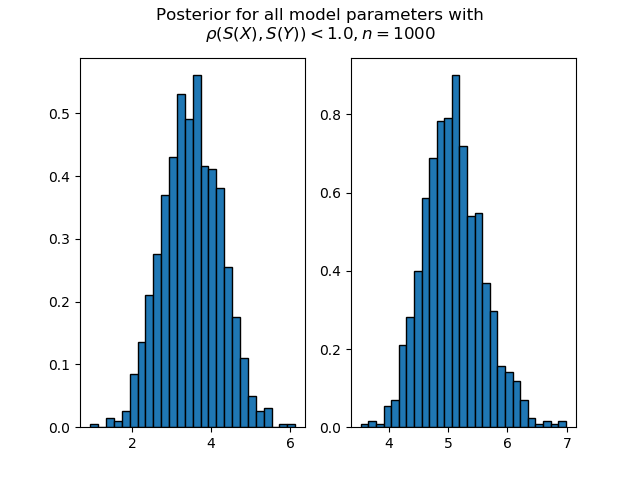

In [7]:
plot_marginals(rej_samp)